In [ ]:
  #conda install datasets matplotlib pandas, conda activate python_course 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)
  

In [5]:
#GOALS:

#1. Investigate top paying roles and skills in the data science industry.
#2. Use python to explore a real-live dataset on job postings.
#3. For job-seekers: use these insights to help find the best job opportunities. 

In [6]:
df_DA_AUS = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Australia')].copy()

df_DA_AUS


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1374,Data Analyst,Data Analyst,Australia,via BeBee Australia,Full-time and Temp work,False,Australia,2023-09-19 06:06:03,True,False,Australia,None,NaN,NaN,Emmbr,"[sql, sql server, ssis, excel]","{'analyst_tools': ['ssis', 'excel'], 'database..."
3859,Data Analyst,Analytics Manager,Anywhere,via LinkedIn,Full-time,True,Australia,2023-05-16 13:30:39,False,False,Australia,None,NaN,NaN,Employment Hero,"[c, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
5226,Data Analyst,Data Analyst,"Sydney NSW, Australia",via BeBee Australia,Full-time,False,Australia,2023-10-21 13:11:42,True,False,Australia,None,NaN,NaN,Bluefin Resources,"[sql, aws, azure, cognos]","{'analyst_tools': ['cognos'], 'cloud': ['aws',..."
6795,Data Analyst,Digital Engineer – Data Analyst,"Perth WA, Australia",via MyPetroCareer,Full-time,False,Australia,2023-02-07 13:26:59,True,False,Australia,None,NaN,NaN,Airswift,[sap],{'analyst_tools': ['sap']}
7053,Data Analyst,Data Analyst,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-07-10 13:37:26,True,False,Australia,None,NaN,NaN,The Recruitment Company Pty Ltd,"[snowflake, azure, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['sno..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782484,Data Analyst,Data Analyst,"Melbourne VIC, Australia",via EFinancialCareers,Full-time,False,Australia,2023-09-20 06:20:15,False,False,Australia,None,NaN,NaN,Hays,"[sql, python, snowflake, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['sno..."
782913,Data Analyst,Data Analytics (Training and Internship),Anywhere,via LinkedIn,Internship,True,Australia,2023-07-12 06:23:51,False,False,Australia,None,NaN,NaN,Oeson | Learning,"[tableau, power bi]","{'analyst_tools': ['tableau', 'power bi']}"
783316,Data Analyst,Data Manager,"Melbourne VIC, Australia",via Jobs Trabajo.org,Full-time,False,Australia,2023-01-08 06:14:19,True,False,Australia,None,NaN,NaN,Alfred Health,None,None
783590,Data Analyst,Data Analytics Training and Internship,Anywhere,via LinkedIn,Internship,True,Australia,2023-06-06 06:41:49,False,False,Australia,None,NaN,NaN,OESON,"[tableau, power bi]","{'analyst_tools': ['tableau', 'power bi']}"


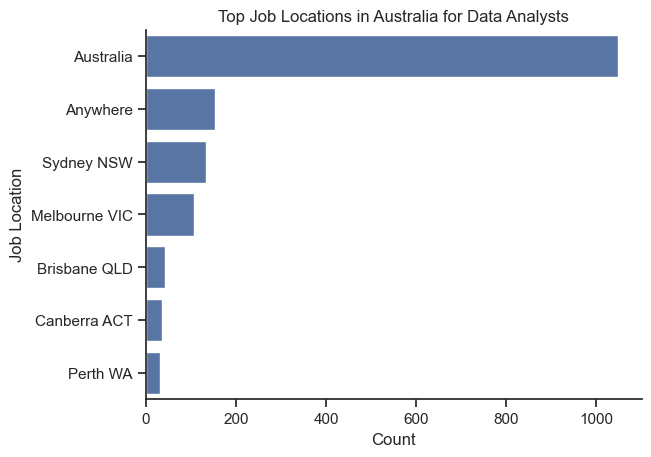

In [38]:
##1. I want a visual summary of the top job locations in Australia for data analysts roles


# Replace 'New South Wales, Australia' with 'Sydney NSW, Australia'
df_DA_AUS['job_location'] = df_DA_AUS['job_location'].replace('New South Wales, Australia', 'Sydney NSW, Australia')

# Remove ', Australia' from the end of any 'job_location'
df_DA_AUS['job_location'] = df_DA_AUS['job_location'].str.replace(', Australia', '', regex=False)

# Get the top 7 job locations and their counts
df_plot = df_DA_AUS['job_location'].value_counts().head(7).reset_index()
df_plot.columns = ['job_location', 'count']

# Plot the data
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location')
sns.despine()

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Job Location')
plt.title('Top Job Locations in Australia for Data Analysts')
plt.show()


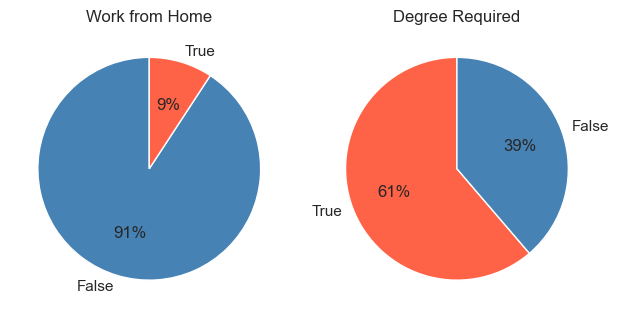

In [49]:
#2. I want to see Work from home and degree requirements

# Define the columns and titles
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Required',
}

fig, ax = plt.subplots(1, 2)

# Define consistent colors for True and False
colors = {True: '#ff6347', False: '#4682b4'}  # Warm red and warm blue

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_AUS[column].value_counts()
    labels = counts.index.astype(str)  # Convert True/False to strings for labeling
    ax[i].pie(
        counts, 
        labels=labels, 
        startangle=90, 
        autopct='%1.0f%%',
        colors=[colors[val] for val in counts.index],
    )
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

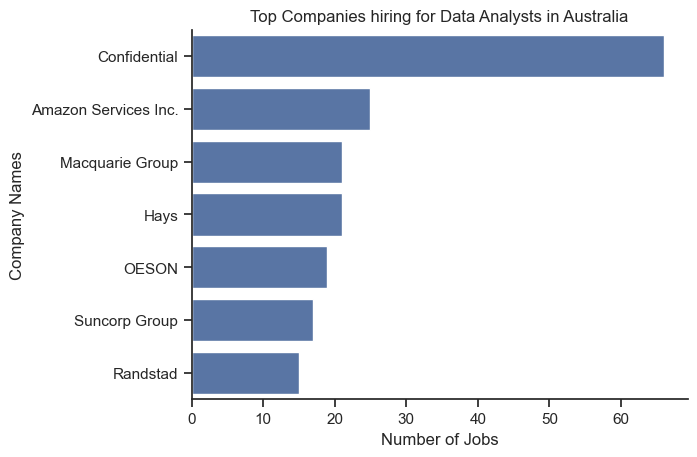

In [53]:
#3. I want to find the counts of the company names

##1. I want a visual summary of the top job locations in Australia for data analysts roles


# Replace 'New South Wales, Australia' with 'Sydney NSW, Australia'
df_DA_AUS['company_name'] = df_DA_AUS['company_name'].replace('New South Wales, Australia', 'Sydney NSW, Australia')

# Remove ', Australia' from the end of any 'company_name'
df_DA_AUS['company_name'] = df_DA_AUS['company_name'].str.replace(', Australia', '', regex=False)

# Get the top 7 job locations and their counts
df_plot = df_DA_AUS['company_name'].value_counts().head(7).reset_index()
df_plot.columns = ['company_name', 'count']

# Plot the data
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name')
sns.despine()

# Add labels and title
plt.xlabel('Number of Jobs')
plt.ylabel('Company Names')
plt.title('Top Companies hiring for Data Analysts in Australia')
plt.show()
